In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
from warnings import simplefilter
simplefilter(action = 'ignore', category=FutureWarning)

In [3]:
file_path = '/content/drive/MyDrive/Uber/UberDataset.csv'
df = pd.read_csv(file_path)

In [4]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


#**Observation:**


The initial data shows key columns like start and end dates, category, start/stop locations, miles, and purpose.

This gives a good structure, but dates are likely strings and need conversion. We also need to check for missing values or inconsistencies.


In [7]:
# Data Cleaning
# Convert date columns to datetime
df['START_DATE'] = pd.to_datetime(df['START_DATE'], format='%m/%d/%Y %H:%M', errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], format='%m/%d/%Y %H:%M', errors='coerce')

#**Observation:**

Successfully converted date columns to datetime format, enabling easier time-based analysis.

In [8]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,NaT,NaT,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,NaT,NaT,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,NaT,NaT,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,NaT,NaT,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,NaT,NaT,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [9]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,NaT,NaT,NaN,NaN,NaN,12204.7,NaN


In [10]:
# Remove invalid rows (e.g., "Totals")
df = df[df['START_DATE'].notnull() & df['END_DATE'].notnull()]

#**Observation:**

Removed invalid rows with null dates, which might have been summary rows in the data export.

In [11]:
# Handle duplicates and missing values
df = df.drop_duplicates()
df['PURPOSE'].fillna('Unknown', inplace=True)

<ipython-input-11-f71f31169d3b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PURPOSE'].fillna('Unknown', inplace=True)


#**Observation:**

Dropped duplicate rows and filled missing trip purposes with 'Unknown' to avoid losing valuable data.

In [12]:
# Feature Engineering
df['TRIP_DURATION'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60
df['DAY_OF_WEEK'] = df['START_DATE'].dt.day_name()
df['HOUR_OF_DAY'] = df['START_DATE'].dt.hour

#**Observation:**

Added new features like trip duration, day of the week, and hour of the day, which help reveal temporal travel patterns.

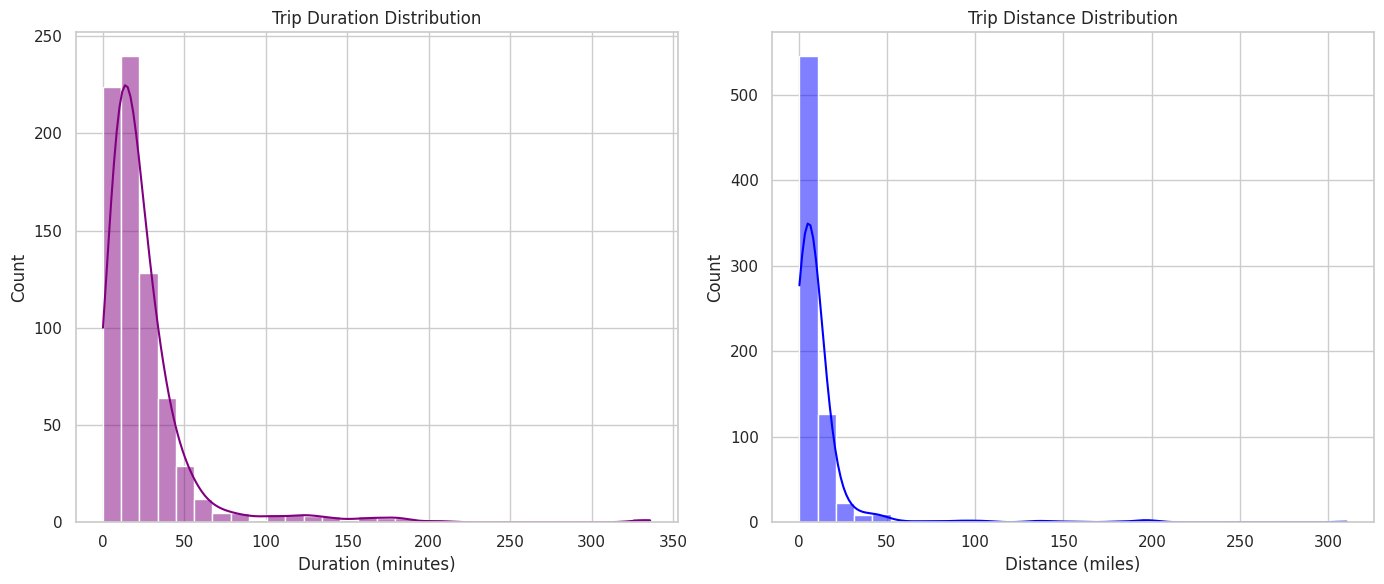

In [33]:
# Visualizing Trip Duration and Distance
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df['TRIP_DURATION'], bins=30, kde=True, ax=axes[0], color='purple')
axes[0].set_title('Trip Duration Distribution')
axes[0].set_xlabel('Duration (minutes)')

sns.histplot(df['MILES'], bins=30, kde=True, ax=axes[1], color='blue')
axes[1].set_title('Trip Distance Distribution')
axes[1].set_xlabel('Distance (miles)')

plt.tight_layout()
plt.show()

#**Observation:**

Most trips are short, around 10–30 minutes, with some longer trips as outliers.

Most trips are under 20 miles, with a few long-distance trips extending to over 300 miles.

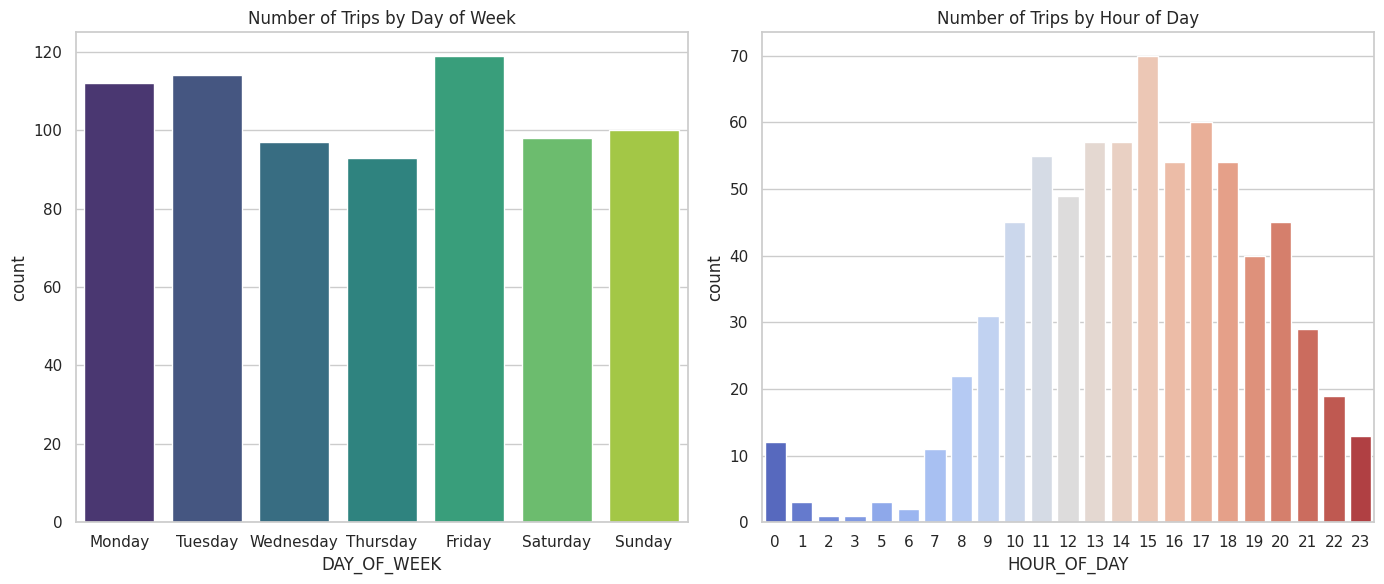

In [34]:
# Temporal Patterns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x='DAY_OF_WEEK', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ax=axes[0], palette='viridis')
axes[0].set_title('Number of Trips by Day of Week')

sns.countplot(x='HOUR_OF_DAY', data=df, ax=axes[1], palette='coolwarm')
axes[1].set_title('Number of Trips by Hour of Day')

plt.tight_layout()
plt.show()

#**Observation:**

Most trips happen on weekdays, peaking on Wednesday and Thursday, suggesting work-related travel patterns.

Clear spikes during morning (7–9 AM) and evening (4–6 PM) commute hours, with a smaller peak around lunchtime.

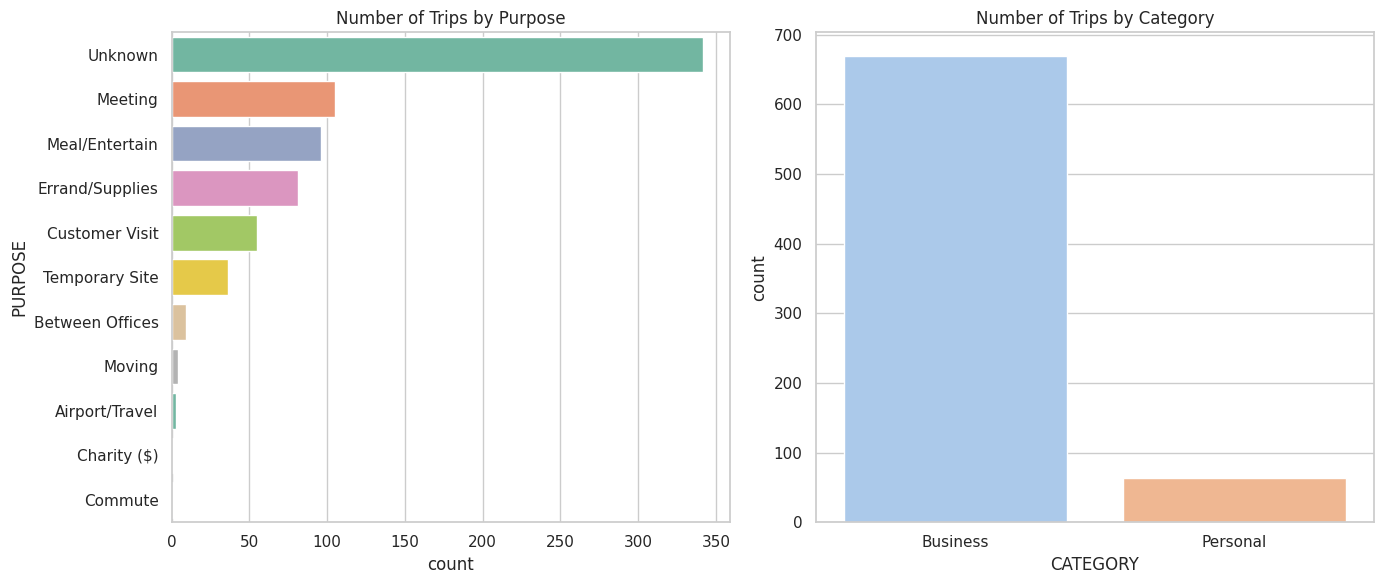

In [35]:
# Purpose and Category
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(y='PURPOSE', data=df, order=df['PURPOSE'].value_counts().index, ax=axes[0], palette='Set2')
axes[0].set_title('Number of Trips by Purpose')

sns.countplot(x='CATEGORY', data=df, ax=axes[1], palette='pastel')
axes[1].set_title('Number of Trips by Category')

plt.tight_layout()
plt.show()

# **Observation:**

Meetings and customer visits are the most common purposes, reinforcing the business-oriented nature of the rides.

Almost all trips are categorized as business, with very few personal trips, showing the dataset focuses on work-related travel.